In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Iris.csv")

In [2]:
df.drop(columns=["Id"], inplace=True)  # Remove ID column


In [3]:
# Display dataset info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


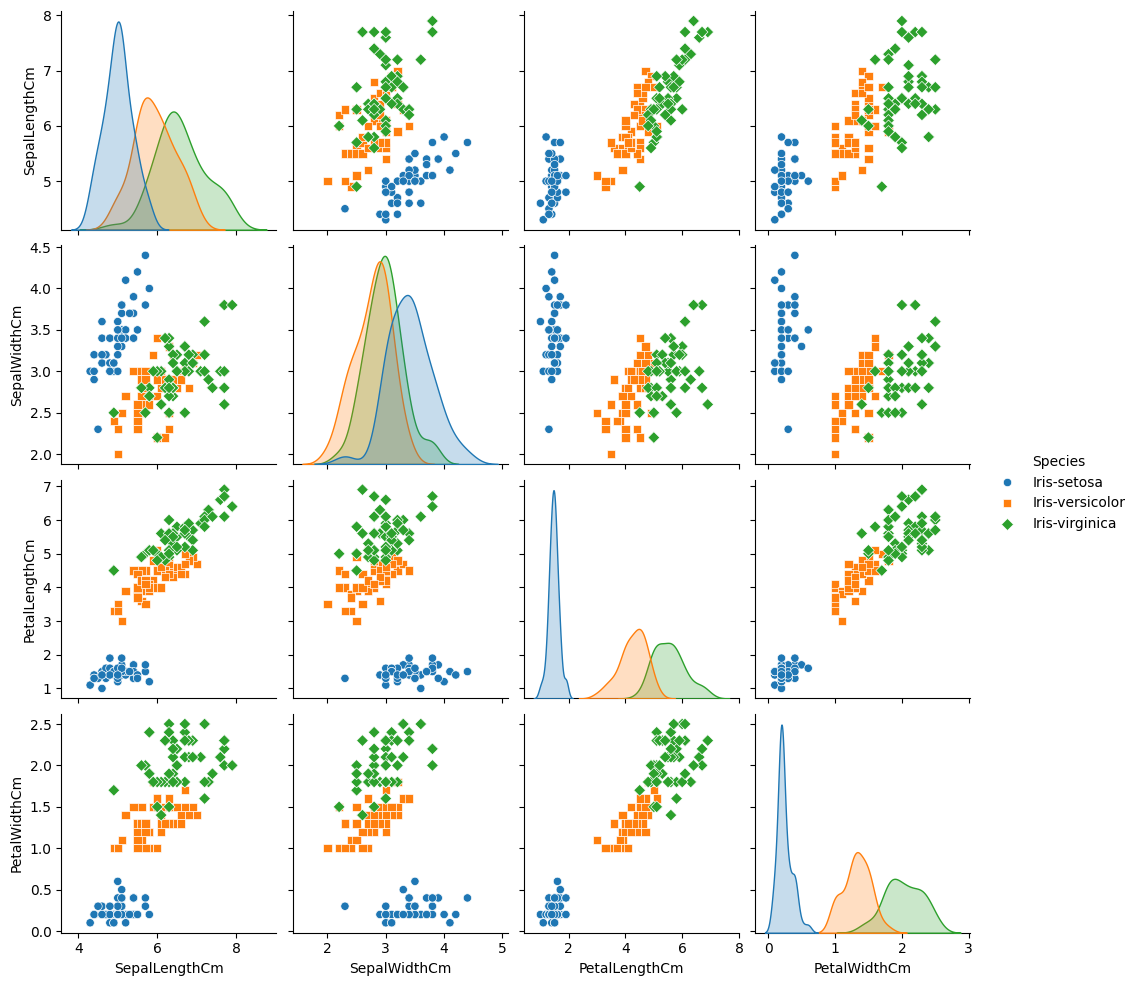

In [4]:
# Pairplot visualization
sns.pairplot(df, hue="Species", markers=["o", "s", "D"])
plt.show()

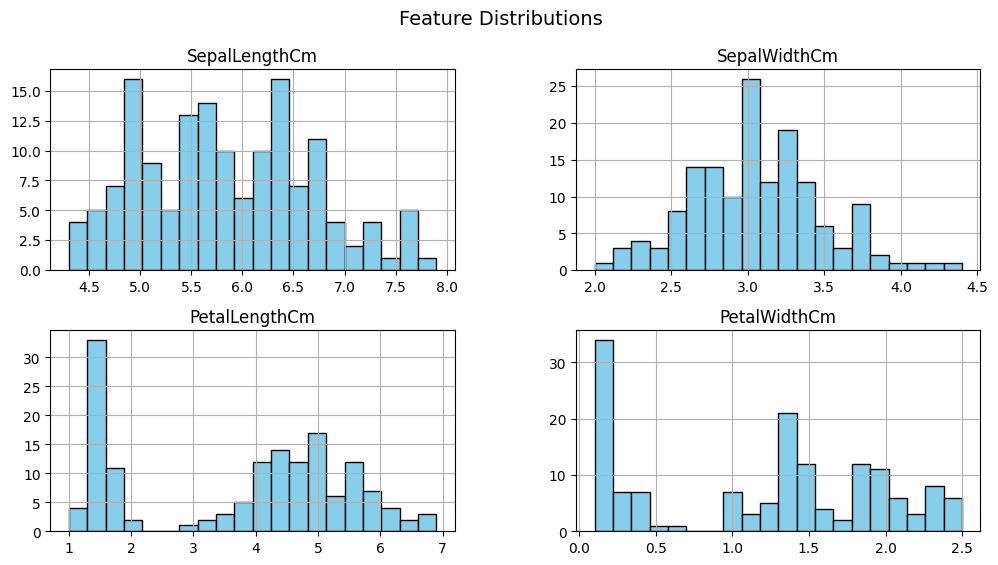

In [6]:
# Feature distribution histograms
df.drop(columns=["Species"]).hist(bins=20, figsize=(12, 6), layout=(2, 2), color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

<ipython-input-7-e4e387d5daad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Species", y=column, data=df, palette="Set2")
<ipython-input-7-e4e387d5daad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Species", y=column, data=df, palette="Set2")
<ipython-input-7-e4e387d5daad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Species", y=column, data=df, palette="Set2")
<ipython-input-7-e4e387d5daad>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

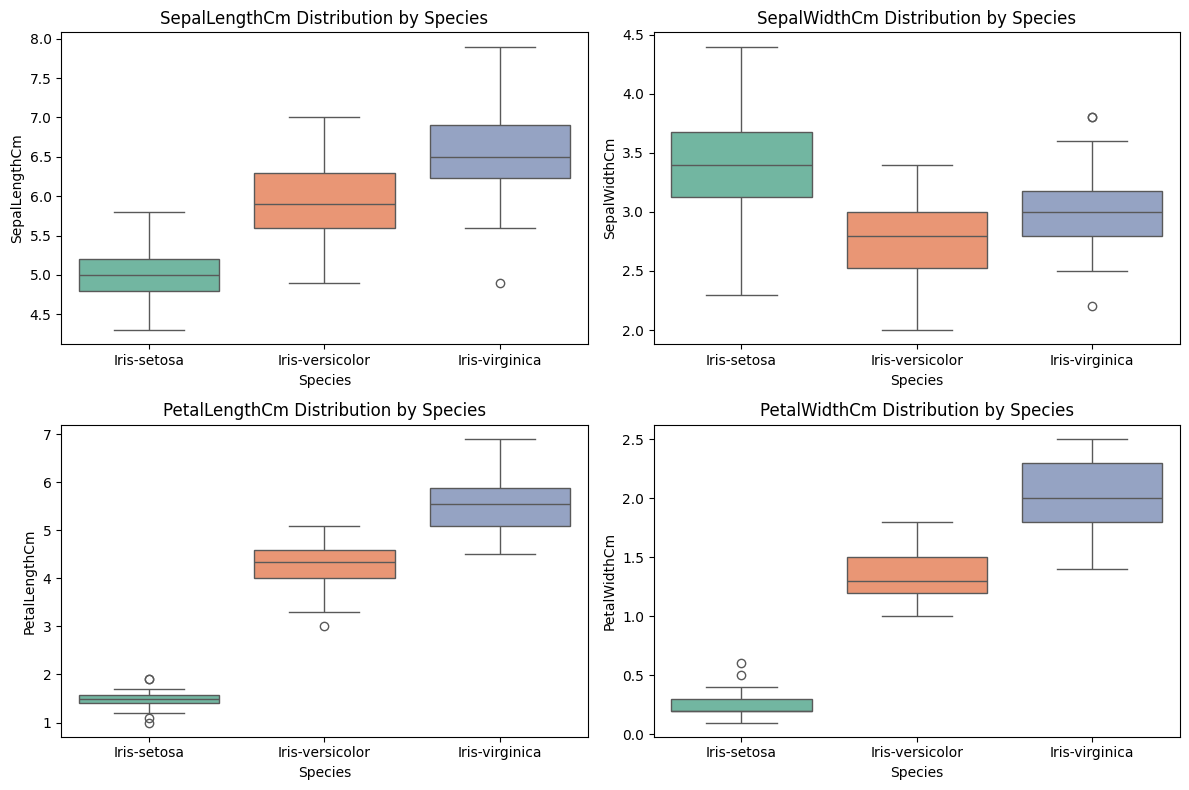

In [7]:
# Boxplots for each feature grouped by species
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="Species", y=column, data=df, palette="Set2")
    plt.title(f"{column} Distribution by Species")
plt.tight_layout()
plt.show()

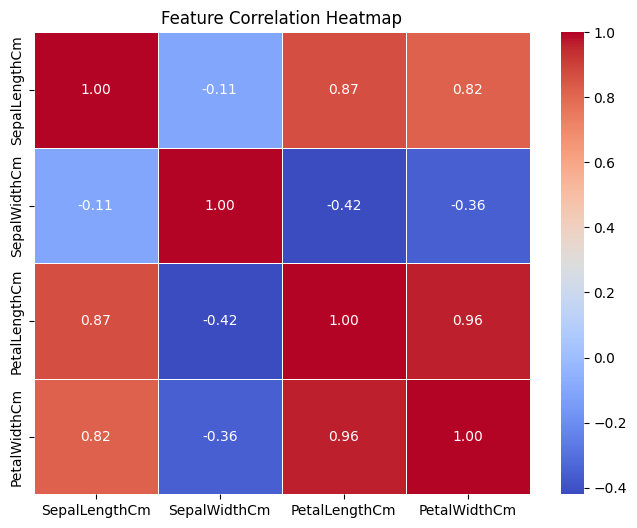

In [8]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df.drop(columns=["Species"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
# Prepare features and target variable
X = df.drop(columns=["Species"])
y = LabelEncoder().fit_transform(df["Species"])

In [10]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=df["Species"].unique())
conf_matrix = confusion_matrix(y_test, y_pred)

In [13]:
# Print results
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Model Accuracy: 0.90
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



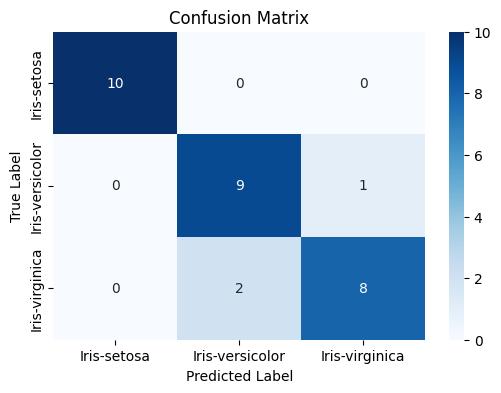

In [14]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df["Species"].unique(), yticklabels=df["Species"].unique())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()